<a href="https://colab.research.google.com/github/andluizsouza/Machine-Learning-tutorials/blob/master/3-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos não supervisionados**

O nosso objetivo é criar um sistema de recomendação de filmes e series (Netflix)

Importando o dataset de filmes

In [ ]:
import pandas as pd
movies_uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
movies_data = pd.read_csv(movies_uri)
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para facilitar a classificação, iremos dividir a variável categórica _genres_ em variáveis binárias para cada gênero: **_dummies_**

In [ ]:
movies_genres = movies_data['genres'].str.get_dummies()
movies_data = pd.concat([movies_data, movies_genres], axis=1)
movies_data.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Rescalonamento de variáveis**

Como extrair mais informações sobre os filmes, além de uma classificação binária dos gêneros?

* um dado filme é mais romance ou comédia?
* qual gênero é o mais dominante neste filme?

Precisamos atribuir um peso aos gêneros, pois eles estão presentes de formas diferentes em cada filme.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
genres_scaled = scaler.fit_transform(movies_genres)
genres_scaled

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

### **Qual é a métrica do rescalonamento?**
- determine os autovetores da matriz dos dummies
- os pesos dos generos serão as componentes no autoespaço


## **Data clustering**

Nessa etapa vamos agrupar os filmes do nosso dataset a partir dos gêneros
> podemos definir o número de cluster que queremos trabalhar

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(genres_scaled)
model.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
movies_cluster = movies_data
movies_cluster['Genre cluster'] = model.labels_
movies_cluster.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Genre cluster
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- _Toy Story_ e _Jumanji_ estão no **cluster 0**
- _Grump Old Men_, _Waititng to  Exhale_ e _Father of Bride Part II_ estão no **cluster 1**



1.   Definir número N de centroides e a sua distribuição ao longo da amostra 
2.   As N mediatrizes dividem a amostra em N clusters
3. Os pontos são alocados nesses clusters
4. Os centroides são reposicionados de modo a minimizar a dispersão dos pontos dentro daquele cluster
5. volte pra 2. até a convergência do método



Veja esse site: [Visualizing KMeans Clustering](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

A posição de cada centroide no espaço dos generos

In [ ]:
centers = pd.DataFrame(model.cluster_centers_,
                      columns=movies_genres.columns)
centers = centers.transpose()
centers

,0,1,2
(no genres listed),0.026511,-0.059180,-0.059180
Action,-0.153210,0.705215,-0.044080
Adventure,-0.320462,1.688153,-0.318707
Animation,-0.242127,1.268411,-0.233272
Children,-0.195550,1.081164,-0.248724
Comedy,0.116359,-0.065823,-0.465873
Crime,0.045672,-0.253110,0.058726
Documentary,0.093136,-0.211288,-0.204306
Drama,0.200333,-0.579100,-0.306979
Fantasy,-0.198365,0.906436,-0.050031


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d57bcf208>,
      dtype=object)

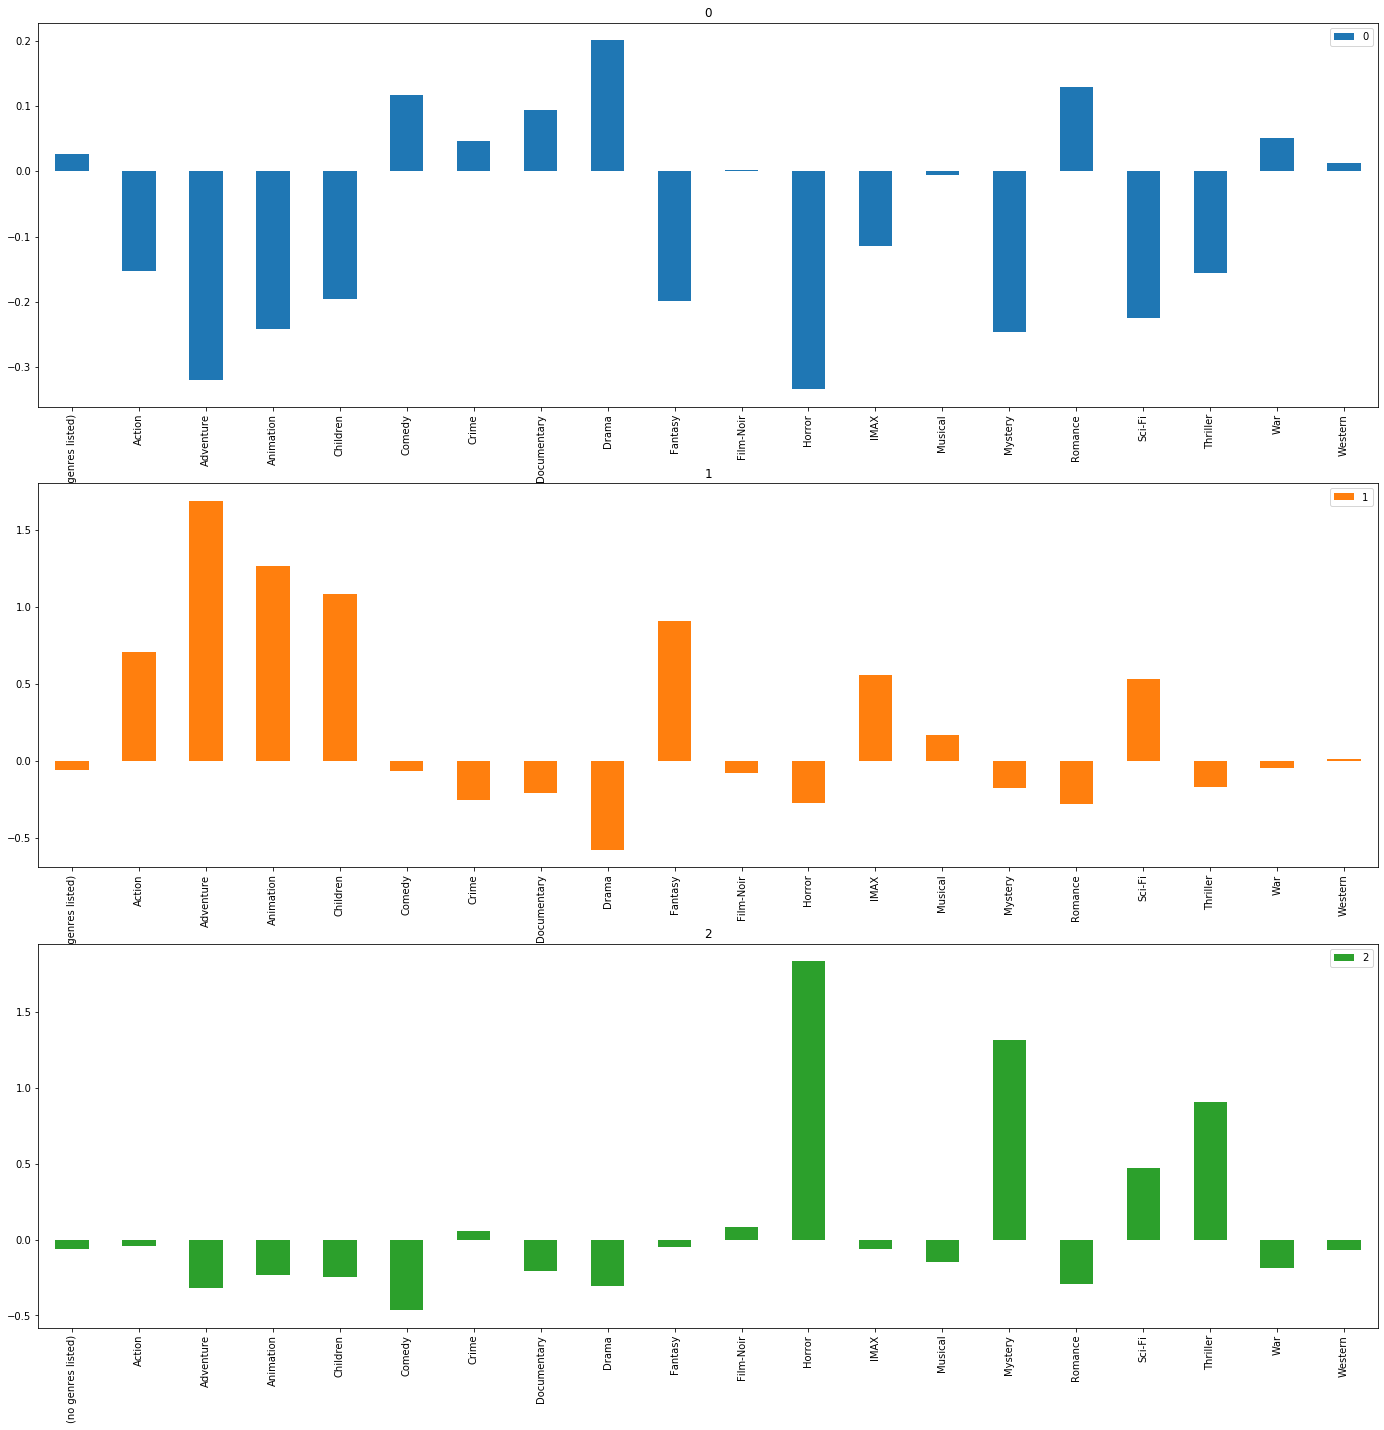

In [ ]:
centers.plot.bar(subplots=True, figsize=(24,24), sharex=False)

- Cluster 0: infantil, aventura, fantasia e animação
- Cluster 1: filmes de comédia
- Cluster 2: drama, terror e mistério


## **Redução de dimensionalidade**

- Como fazer um gráfico em 20 dimensões? 
- Precisamos reduzi-las para podemos ver de fato a relação entre os generos dos filmes

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
visual = tsne.fit_transform(genres_scaled)
visual

array([[ 16.819538 , -45.830784 ],
       [-17.124651 , -42.93656  ],
       [ 20.282228 ,  28.9975   ],
       ...,
       [ 23.940405 , -19.563353 ],
       [-32.12413  , -36.176003 ],
       [  1.3577454,  10.0324   ]], dtype=float32)

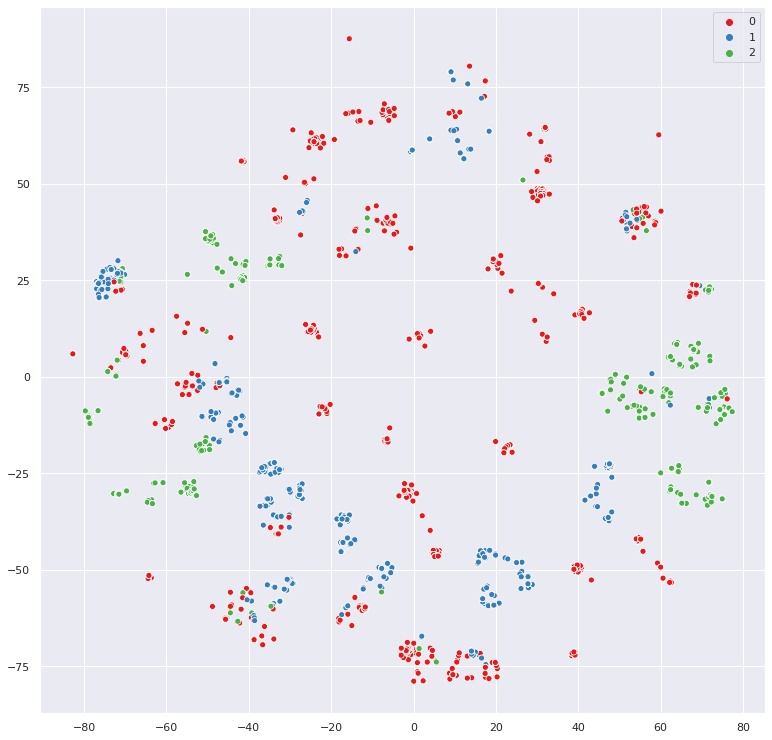

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize': (13,13)})
sns.scatterplot(x=visual[:,0], y=visual[:,1],
                hue=model.labels_, 
                palette=sns.color_palette('Set1',3))

Os pontos estão próximos/distantes de fato? Não!
- Devido à redução de dimensões, perdemos informação e a noção de profundidade

## **Número de centroides**

Se aumentarmos o número de centroides, como ficará o agrupamento de filmes?

In [ ]:
model_bigger = KMeans(n_clusters=20)
model_bigger.fit(genres_scaled)

centers_bigger = pd.DataFrame(model_bigger.cluster_centers_,
                      columns=movies_genres.columns)
centers_bigger.transpose()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
(no genres listed),-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,16.897616,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180
Action,0.836638,2.080702,-0.480607,-0.480607,-0.440080,-0.480607,-0.331477,-0.169420,0.404605,1.026999,-0.462136,2.080702,-0.333405,0.128485,0.420221,-0.435168,0.426134,-0.156647,-0.480607,1.015655
Adventure,2.591019,-0.135711,-0.385949,-0.385949,-0.027959,-0.385949,-0.359949,1.049673,0.035718,1.121377,-0.364480,-0.385949,-0.317512,0.249380,0.809527,-0.383169,0.515834,-0.268282,-0.299030,0.664746
Animation,-0.258679,-0.234769,-0.258679,-0.258679,0.563605,-0.258679,-0.258679,1.460493,-0.211943,0.628865,-0.238850,-0.258679,-0.163864,-0.183231,-0.258679,-0.258679,3.865793,-0.226075,-0.258679,-0.258679
Children,-0.270451,-0.270451,-0.270451,-0.270451,0.721543,-0.270451,-0.264675,3.697524,-0.259210,0.482962,-0.260913,-0.270451,-0.270451,-0.125281,-0.270451,-0.270451,-0.270451,-0.207716,-0.263210,-0.254354
Comedy,-0.107276,-0.172783,1.262425,-0.792126,0.248153,-0.792126,-0.379422,0.379160,-0.466192,-0.441032,-0.604451,-0.117144,-0.744895,-0.303544,0.065285,0.487412,-0.072284,-0.516021,-0.102277,-0.429558
Crime,-0.355305,2.669289,-0.374632,-0.374632,-0.297570,-0.374632,-0.250571,-0.323425,-0.297025,-0.162713,-0.338046,-0.374632,1.444723,-0.189027,-0.294739,-0.374632,-0.252430,0.491623,2.669289,-0.331412
Documentary,-0.217489,-0.217489,-0.217489,-0.217489,-0.034626,-0.217489,-0.217489,-0.217489,-0.190207,0.026329,4.597924,-0.217489,-0.217489,-0.188127,-0.204851,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489
Drama,-0.102210,-0.072509,-0.265629,0.981359,-0.181104,-0.900247,-0.598735,-0.588252,0.751893,-0.492945,-0.808396,-0.193191,0.255531,-0.189021,-0.214061,0.337180,-0.518587,0.145024,0.406204,-0.496404
Fantasy,-0.294810,-0.262751,-0.294810,-0.294810,0.265214,-0.294810,-0.208945,0.814684,-0.253033,0.801904,-0.285947,-0.294810,-0.252433,-0.159926,3.392017,-0.294810,0.687447,-0.032506,-0.288082,-0.287332


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d5184de80>,
      dtype=object)

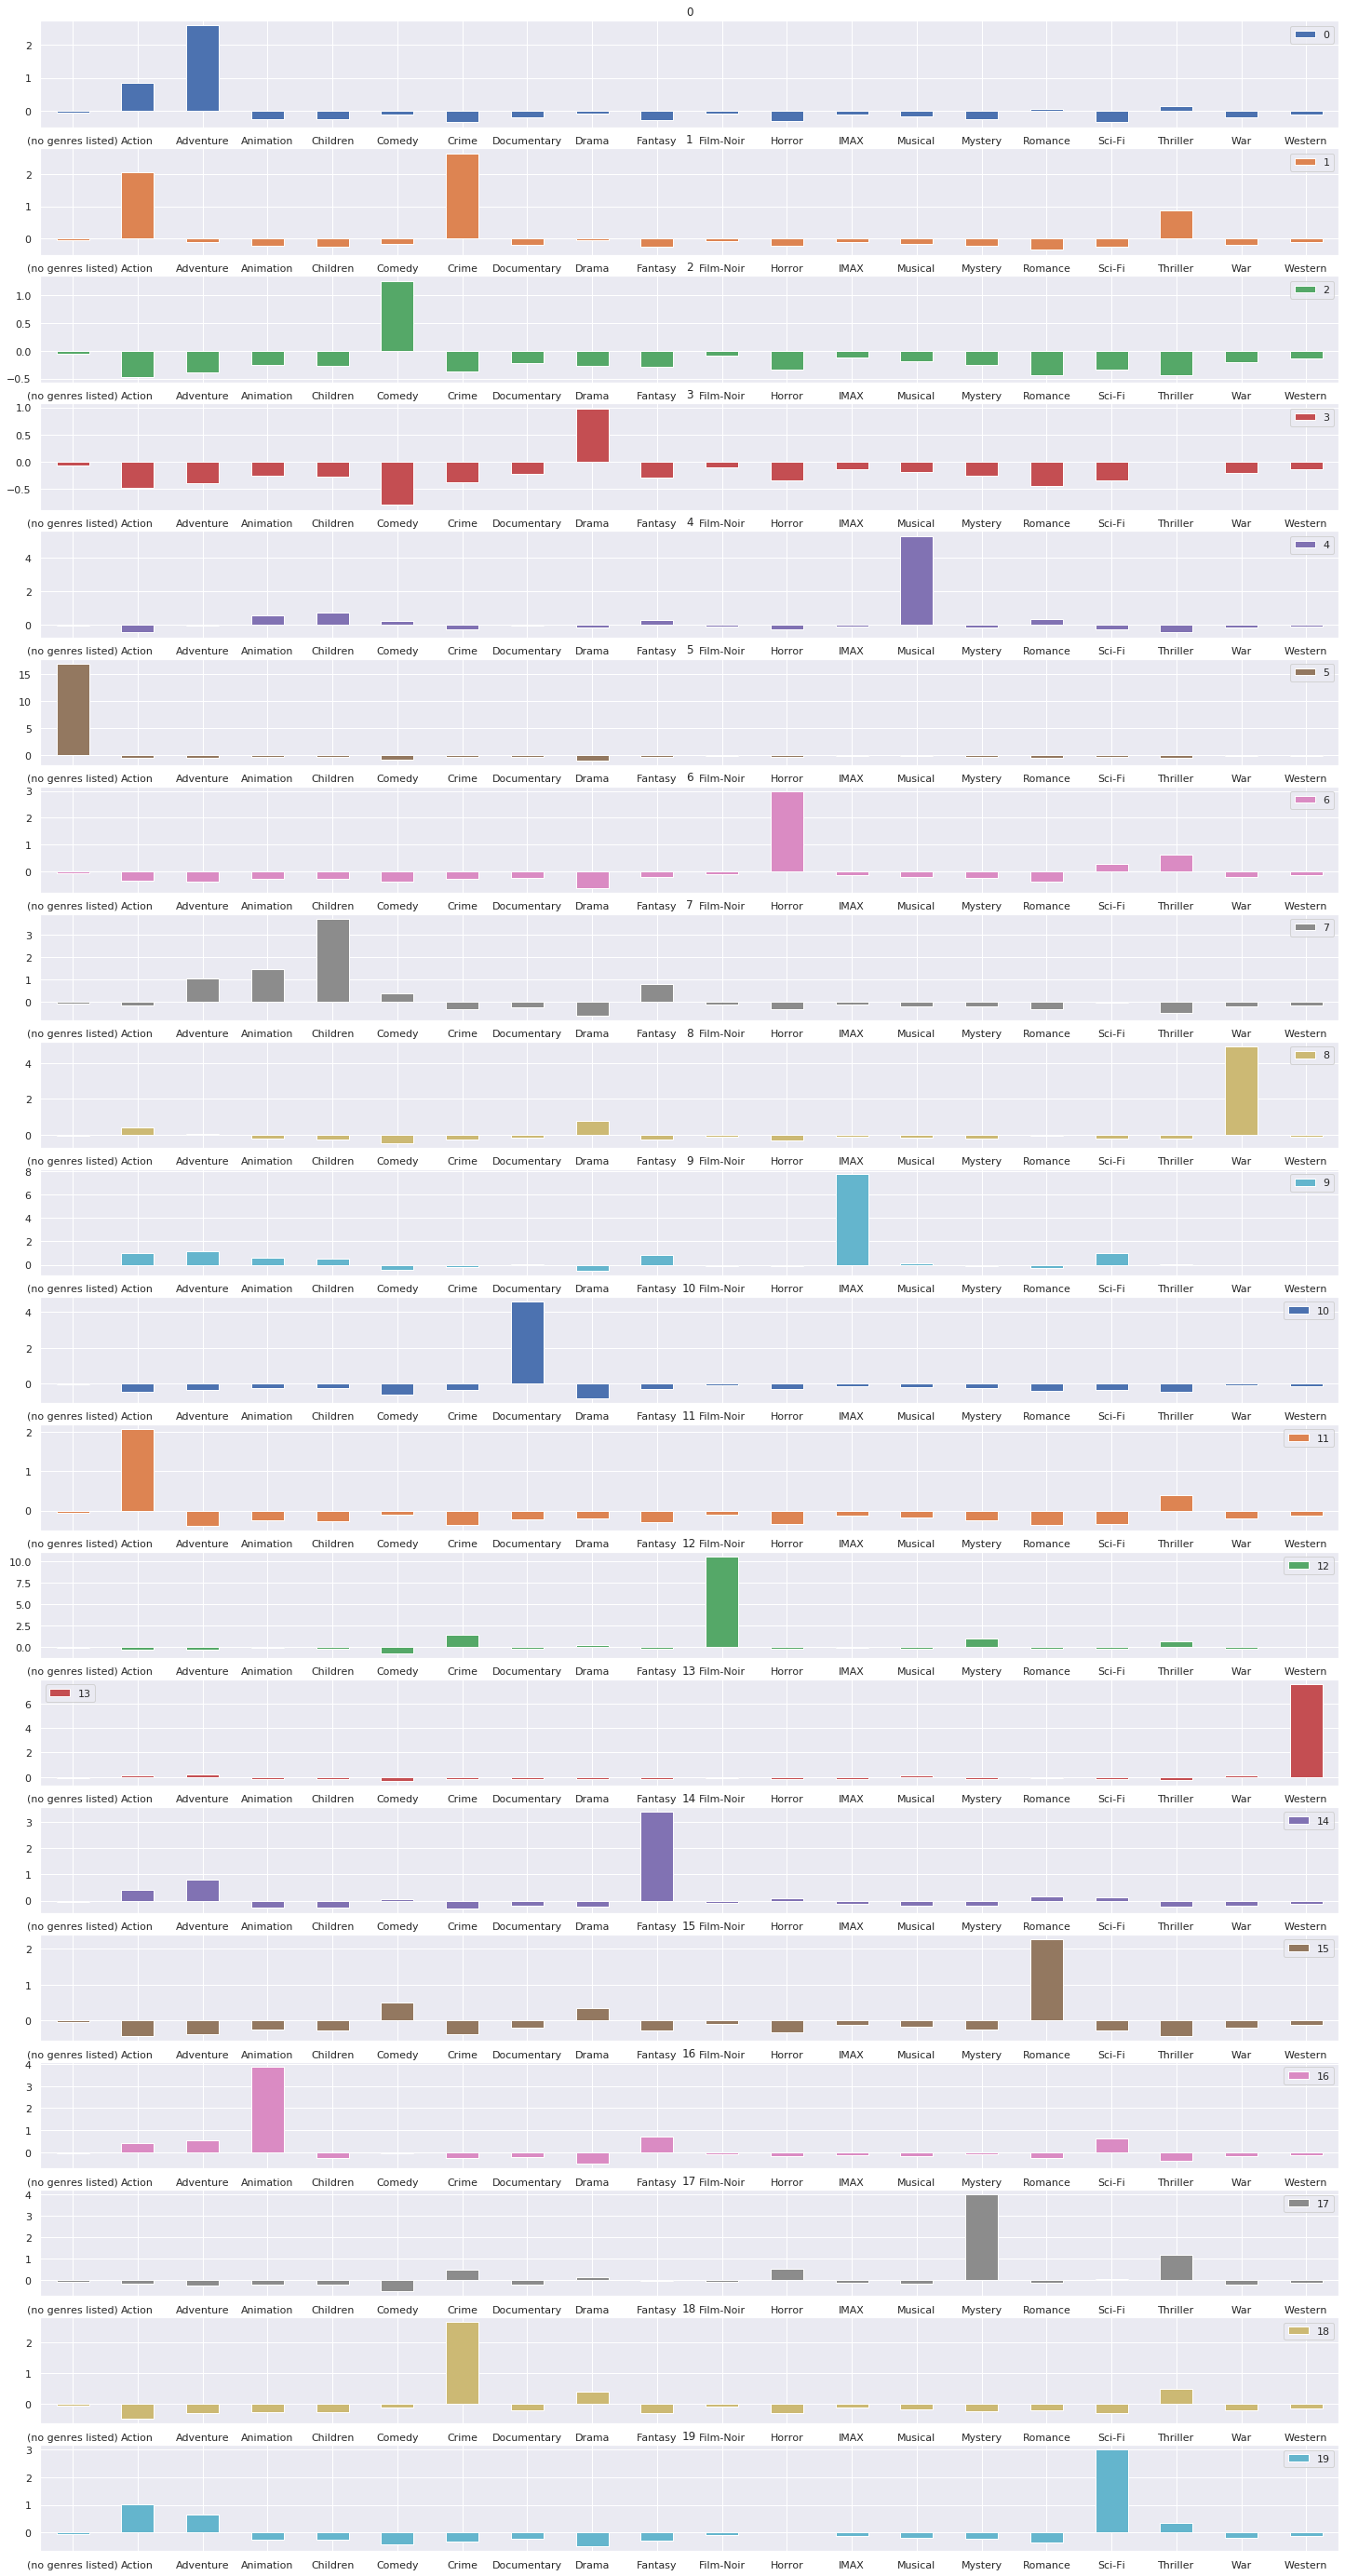

In [ ]:
centers_bigger.transpose().plot.bar(subplots=True, 
                                    figsize=(25,50), sharex=False, rot=0)

Qual é o número ideal de cluster?
* Se N for muito grande, nós iremos agrupar somente filmes muito semelhantes e indicar ao usuário sempre os mesmos filmes, sem variabilidade
* Se N for muito pequeno, o agrupamento será genérico e iremos indicar ao usuário filmes muito diferentes e que talvez ele não goste
> **Minimizar a soma dos desvios médios ao quadrado da distribuição dos pontos $r_{ij}$ ao redor do centroide $R_i$ de cada cluster**: $$\chi^2 = \sum_{i}\sum_{j} |R_{i} - r_{ij}|^2$$

A função model.inertia_ do KMeans já calcula o $\chi^2$ total dado o número de clusters e a variável rescalonada

In [ ]:
def KMeans_error(n_clusters, variable_scaled):
  model = KMeans(n_clusters=n_clusters)
  model.fit(variable_scaled)
  return [n_clusters, model.inertia_]

In [ ]:
KMeans_error(3, genres_scaled)

[3, 166397.87053417182]

In [ ]:
KMeans_error(20, genres_scaled)

[20, 54756.44633829563]

In [ ]:
KMeans_error(10, genres_scaled)

[10, 102837.47025959706]

Qual número de clusters minimiza o erro?

In [ ]:
error_list = [KMeans_error(n_clusters, genres_scaled) for n_clusters in range(1,41)]
error_list

[[1, 194840.0],
 [2, 179528.16927707611],
 [3, 166085.5962804719],
 [4, 157003.69814742607],
 [5, 147274.597619053],
 [6, 138585.79036322664],
 [7, 128537.72666579142],
 [8, 119042.42669271005],
 [9, 109564.86670348923],
 [10, 103153.64563437858],
 [11, 95198.63928953138],
 [12, 87522.21237816432],
 [13, 82296.70686943787],
 [14, 73077.67894892207],
 [15, 66834.83020322333],
 [16, 64713.00623051311],
 [17, 63203.127355859986],
 [18, 58727.955379880805],
 [19, 56025.15588613477],
 [20, 55380.41881037471],
 [21, 54017.61496524534],
 [22, 51790.60935172343],
 [23, 51073.98808465781],
 [24, 48516.14045827029],
 [25, 48284.32631814238],
 [26, 46444.49062233744],
 [27, 45861.324255118874],
 [28, 44575.0924486712],
 [29, 43977.99875151479],
 [30, 42250.939526247355],
 [31, 42355.69674698544],
 [32, 40712.80735766936],
 [33, 40463.434678059566],
 [34, 39523.392832952806],
 [35, 37828.242069804495],
 [36, 38055.96479638054],
 [37, 38244.819888496444],
 [38, 36078.44909587044],
 [39, 35662.77374

In [ ]:
inertia_data = pd.DataFrame(error_list, columns=['n_cluster', 'inertia'])

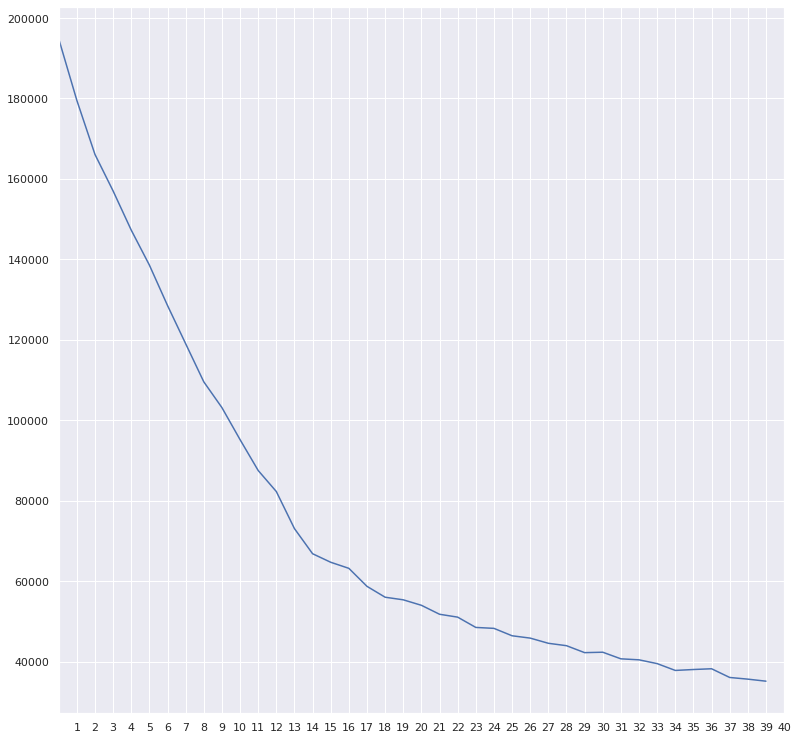

In [ ]:
inertia_data.inertia.plot(xticks=inertia_data.n_cluster)

O ponto de cotovelo (elbow point) é n_clusters = 16 para esse problema, n > 16 não há mais uma variância significante. 
> Usar um número maior que esse pode criar ilhas quase vazias no sistema de nosso agrupamento

## **Agrupamento hierárquico**

Quais gêneros são mais próximos um do outro?
* Romance está perto de comédia e drama
* Romance está bem longe de terror

Esse método é diferente do que usamos anteriormente, o agrupamento particionado.
> O agrupamento hierárquico é muito utilizado em algoritmos de organização de palavras e análise textual. Mais info: [hierarchical clustering](https://www.saedsayad.com/clustering_hierarchical.htm)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=17)
group_labels = model.fit_predict(genres_scaled)

Visualizando a dispersão dos pontos

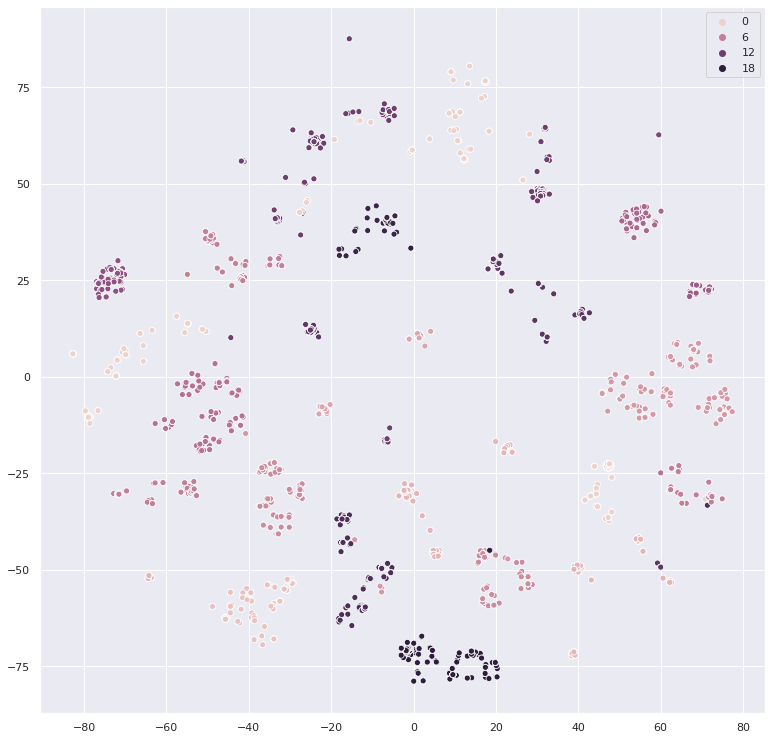

In [ ]:
sns.scatterplot(x=visual[:,0], y=visual[:,1],
                hue=group_labels)

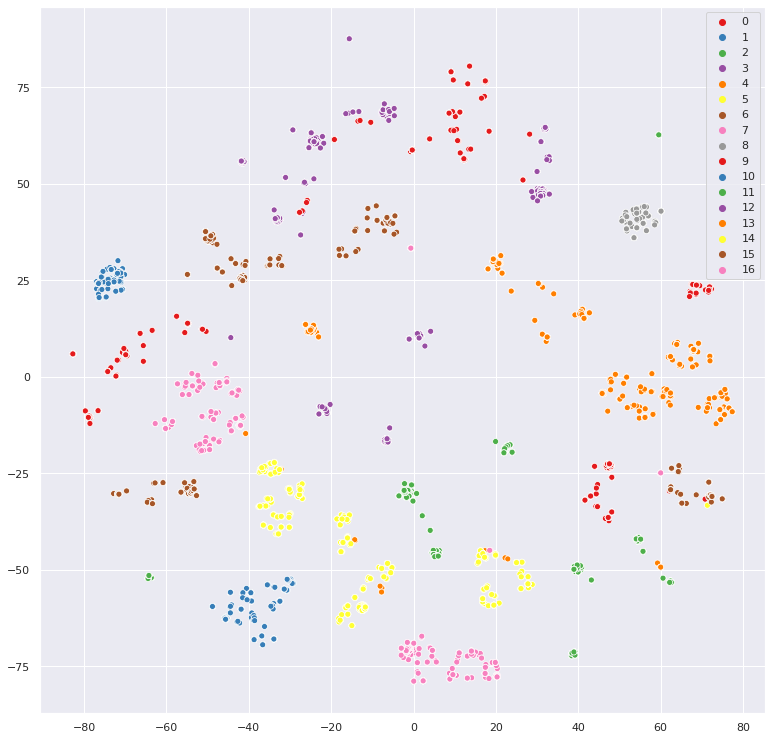

In [ ]:
sns.scatterplot(x=visual[:,0], y=visual[:,1],
                hue=group_labels, 
                palette=sns.color_palette('Set1',17))

## **Dendograma**

O agrupamento hierárquico calcula a matriz de distância entre os clusters

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
clustering = KMeans(n_clusters=17)
clustering.fit(genres_scaled)

cluster_data = pd.DataFrame(clustering.cluster_centers_,
                      columns=movies_genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d4ff366d8>,
      dtype=object)

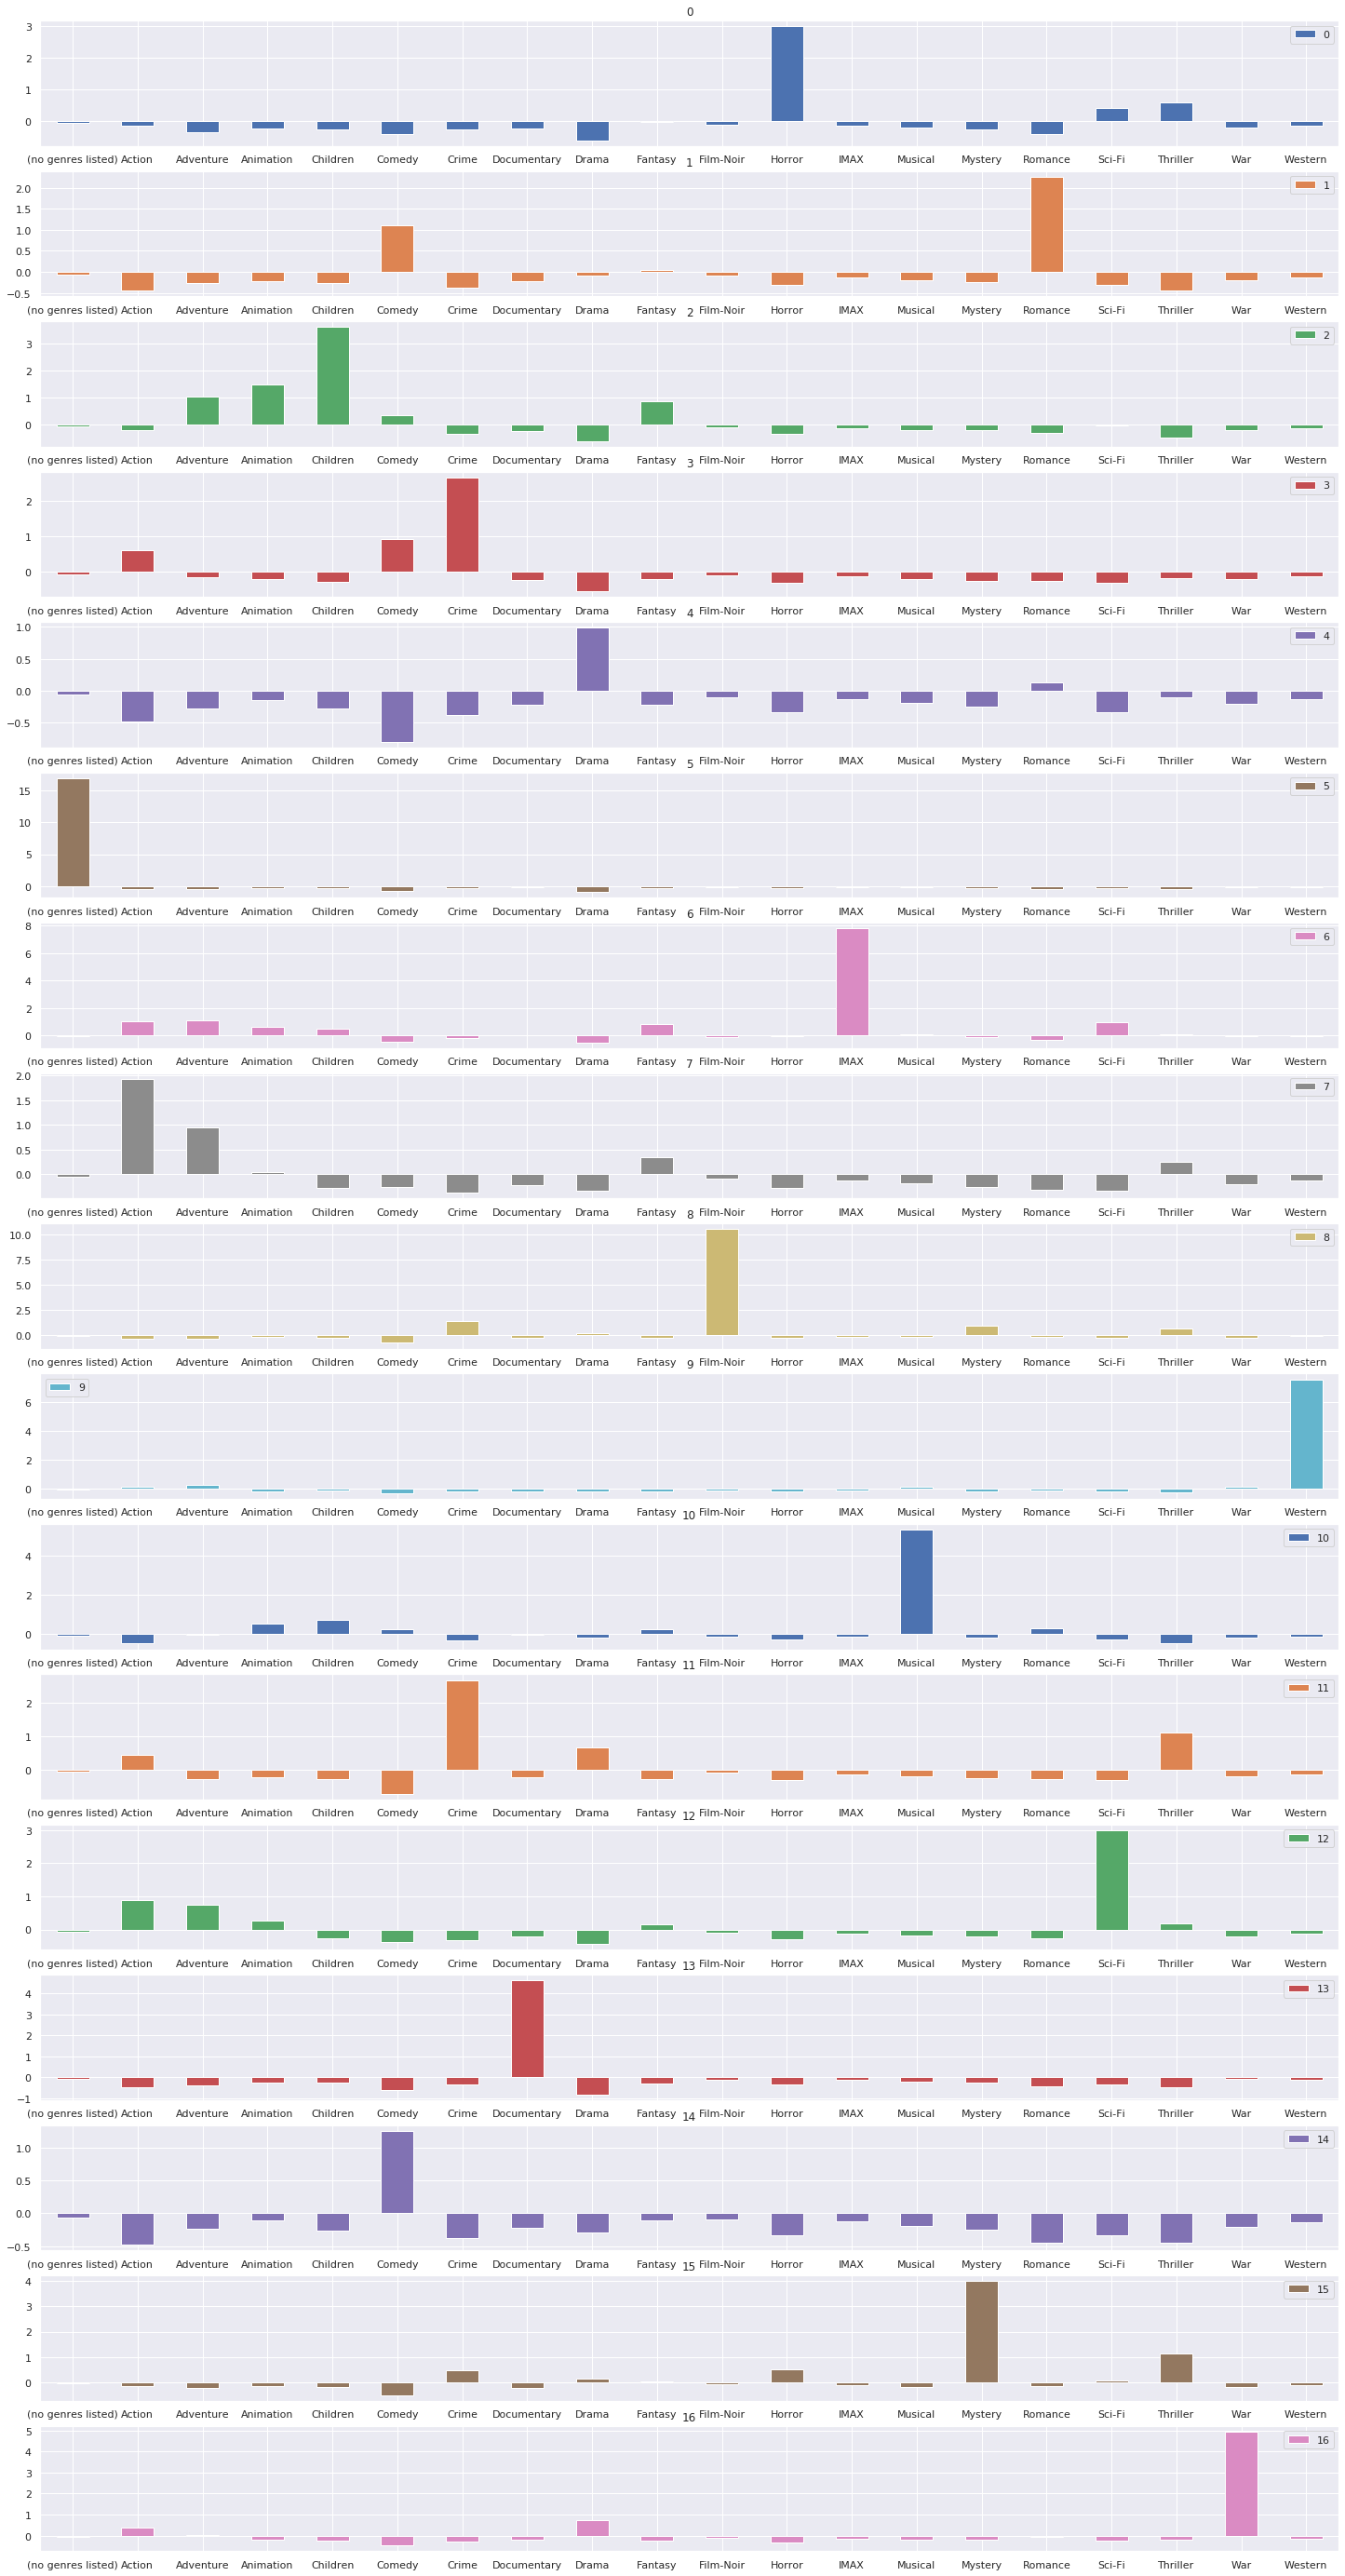

In [ ]:
cluster_data.transpose().plot.bar(subplots=True, 
                                    figsize=(25,50), sharex=False, rot=0)

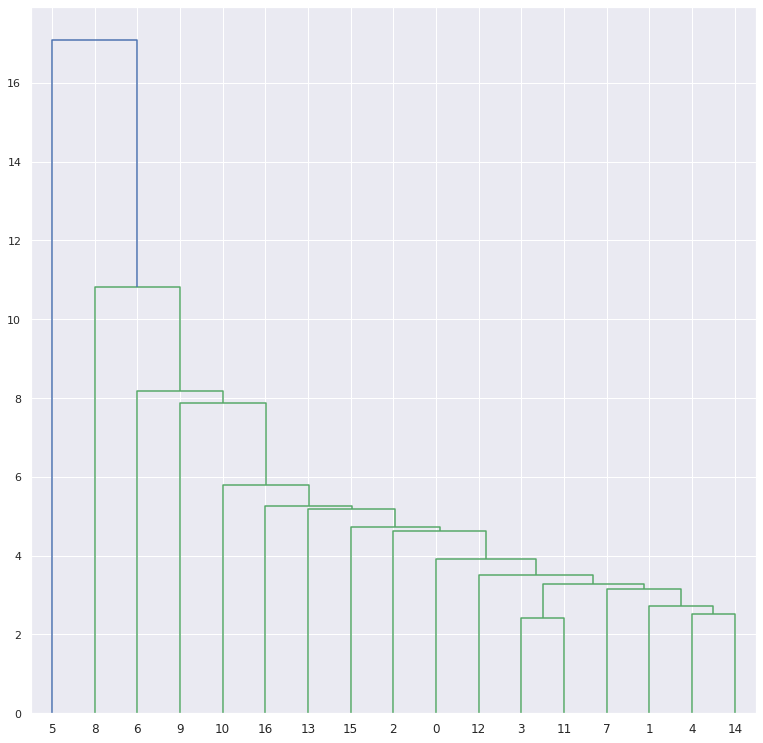

In [ ]:
dist_matrix = linkage(cluster_data)
dendo_graph = dendrogram(dist_matrix)

Os grupos 1 (romance), 4 (drama), 14 (comédia) estão bem próximos

Como agrupar sem definir o número de cluster? Veja o método [DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)